## DS 690

#### - Harsh Bhanderi

### Assignment 5

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 3):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2017 school years.

Your Jupyter Notebook file should not be in the CollegeScorecard_Raw_Data folder. 

I suggest you create a new folder call "Assignment4" and place the Notebook file and the data folder under it.

Assignment4/
    - Jay.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'


In [43]:
# <1> 
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
#(Write code here)

In [7]:
# <2>
# Find out what files are in the folder and assign the list of files to a variable for later processing
# you would need to import a library call os which stands for operating system. so place that import statement in previous cell.
# # os library also has method getcwd() to get the current working directory. since your notebook and your data files are not in 
# the same folder, you want to make sure what is the current working folder and how to access a data file in a different folder
# display the current workin directory

os.getcwd()

'C:\\Users\\Harsh Bhanderi\\Desktop\\UMBC Assignments\\Spring 20\\690 Assignments'

In [6]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder
# use this method to assign the contents of the data folder to a variable and display it

os.listdir()

['.ipynb',
 '.ipynb_checkpoints',
 'A1_Harsh_Bhanderi.ipynb',
 'A1_Harsh_Bhanderi.py',
 'A2-5_HarshBhanderi.ipynb',
 'A2_Harsh_Bhanderi.py',
 'A3_HarshBhanderi.ipynb',
 'A4_HarshBhanderi.ipynb',
 'Assignment-05.ipynb',
 'CAvideos.csv',
 'CA_category_id.json',
 'CollegeScorecard_Raw_Data',
 'Data',
 'Deliverable_1_Project_Proposal_HarshBhanderi.docx',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MIA2.csv',
 'MXvideos.csv',
 'MX_category_id.json',
 'P2_Harsh_Bhanderi.zip',
 'Project_Deliverable2_HarshBhanderi.ipynb',
 'RUvideos.csv',
 'RU_category_id.json',
 'Untitled.ipynb',
 'USvideos.csv',
 'US_category_id.json',
 '~$liverable_1_Project_Proposal_HarshBhanderi.docx',
 '~WRL0240.tmp']

In [15]:
# <4> 
# The folder contains a couple of files that are not the yearly data files
# write code to remove the unwanted files from the list (Note: not from the folder in your drive)
# hint: use pop or remove functions of a list. pop and remove work differently though.

data = 'CollegeScorecard_Raw_Data/'

In [16]:
files = os.listdir(data)

In [17]:
files

['.DS_Store',
 'Crosswalks',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv']

In [18]:
files.pop(0)
files.pop(0)
files.pop(0)
files.pop(0)
files.pop(0)
files.pop(0)

'FieldOfStudyData1516_1617_PP.csv'

In [19]:
files

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv']

In [20]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load three columns: UNITID, ADM_RATE, and TUITIONFEE_IN
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

col = ['UNITID', 'ADM_RATE', 'TUITIONFEE_IN']
list_df = []

for i in files:
    temp = pd.read_csv(data + i, usecols = col)
    temp['YEAR'] = i[6:10]
    list_df.append(temp)

In [22]:
df = pd.concat(list_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154282 entries, 0 to 7111
Data columns (total 4 columns):
UNITID           154282 non-null int64
ADM_RATE         42583 non-null float64
TUITIONFEE_IN    74888 non-null float64
YEAR             154282 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 5.9+ MB


In [24]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df.head()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,NaN,NaN,1996
1,100654,NaN,NaN,1996
2,100663,NaN,NaN,1996
3,100672,NaN,NaN,1996
4,100690,NaN,NaN,1996


In [25]:
df.tail()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
7107,48312404,NaN,NaN,2017
7108,48387801,NaN,NaN,2017
7109,48400201,NaN,NaN,2017
7110,48778201,NaN,NaN,2017
7111,49005401,NaN,22575.0,2017


In [26]:
df.sample()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
7199,461829,NaN,NaN,2011


In [27]:
df.shape

(154282, 4)

In [30]:
df.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN
count,1.542820e+05,42583.000000,74888.000000
mean,9.008766e+05,0.694096,11490.999226
std,4.413740e+06,0.215820,9754.405657
min,1.006360e+05,0.000000,0.000000
25%,1.628300e+05,0.555600,3686.000000
50%,2.122760e+05,0.718100,9200.000000
75%,4.060600e+05,0.857100,15995.000000
max,4.900540e+07,1.000000,74787.000000


In [31]:
df.isna().sum()

UNITID                0
ADM_RATE         111699
TUITIONFEE_IN     79394
YEAR                  0
dtype: int64

In [33]:
# <7>
# the dataframe contains 22 years of data of all U.S. colleges.
# let's just look at UMBC
# filte/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

umbc = df[df['UNITID']==163268]
umbc.sample(10)

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
1540,163268,0.5942,11006.0,2015
1478,163268,0.6021,11518.0,2017
1799,163268,0.7143,8520.0,2005
1496,163268,0.5683,11264.0,2016
1924,163268,NaN,NaN,1998
1980,163268,NaN,NaN,1997
1615,163268,0.6315,10068.0,2013
1776,163268,0.7153,8622.0,2006
1727,163268,0.6890,8872.0,2009
1597,163268,0.5961,10384.0,2014


In [35]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

umbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2083 to 1478
Data columns (total 4 columns):
UNITID           22 non-null int64
ADM_RATE         17 non-null float64
TUITIONFEE_IN    18 non-null float64
YEAR             22 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 880.0+ bytes


In [37]:
umbc.head(5)

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
2083,163268,NaN,NaN,1996
1980,163268,NaN,NaN,1997
1924,163268,NaN,NaN,1998
1915,163268,NaN,NaN,1999
1878,163268,NaN,5490.0,2000


In [38]:
umbc.tail()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
1615,163268,0.6315,10068.0,2013
1597,163268,0.5961,10384.0,2014
1540,163268,0.5942,11006.0,2015
1496,163268,0.5683,11264.0,2016
1478,163268,0.6021,11518.0,2017


In [39]:
umbc.sample()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
1645,163268,0.6035,9764.0,2012


In [40]:
umbc.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN
count,22.0,17.000000,18.000000
mean,163268.0,0.644300,8850.777778
std,0.0,0.052013,1747.028925
min,163268.0,0.568300,5490.000000
25%,163268.0,0.602100,8145.000000
50%,163268.0,0.632700,8826.000000
75%,163268.0,0.689500,9992.000000
max,163268.0,0.717400,11518.000000


In [41]:
umbc.isna().sum()

UNITID           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

Text(0, 0.5, 'Tuition')

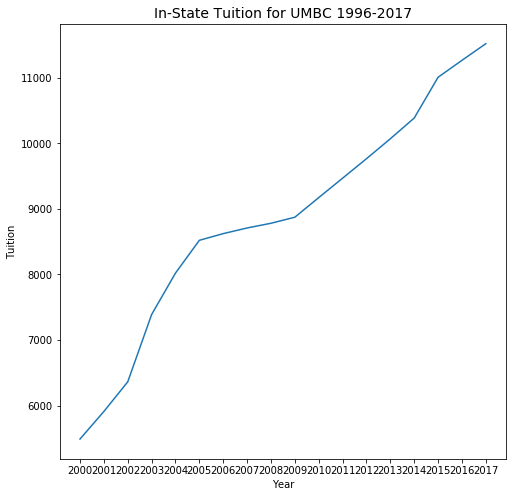

In [50]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2017.

fig, ax = plt.subplots(figsize=(8,8))  
ax.plot(umbc['YEAR'], umbc['TUITIONFEE_IN'])
ax.set_title('In-State Tuition for UMBC 1996-2017', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Tuition')

In [51]:
# <10>
# go back to 5/6/7 and modify the code to look at Johns Hopskins University instead.
# (No code to write here, you just modify the previous cells)

john_hopskins = df[df['UNITID']==162928]
john_hopskins.sample()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
1915,162928,NaN,NaN,1998


Text(0, 0.5, 'Tuition')

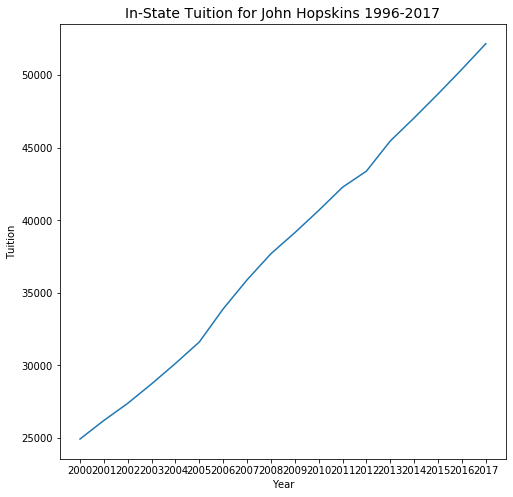

In [53]:
fig, ax = plt.subplots(figsize=(8,8))  
ax.plot(john_hopskins['YEAR'], john_hopskins['TUITIONFEE_IN'])
ax.set_title('In-State Tuition for John Hopskins 1996-2017', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Tuition')

In [54]:
# <11> 
# Now, we like to compare UMBC and JHU
# filte/query the dataframe to retrieve only rows that belong to UMBC orJHU
# save the UMNC/JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

comb = df[(df['UNITID']==163268)| (df['UNITID']==162928)]

In [55]:
# <12>
# Explore the new dataframe (#of observations, varibles, head, tail, sample, missing values, statistics,etc.)

comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2072 to 1478
Data columns (total 4 columns):
UNITID           44 non-null int64
ADM_RATE         34 non-null float64
TUITIONFEE_IN    36 non-null float64
YEAR             44 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [56]:
comb.head()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
2072,162928,NaN,NaN,1996
2083,163268,NaN,NaN,1996
1970,162928,NaN,NaN,1997
1980,163268,NaN,NaN,1997
1915,162928,NaN,NaN,1998


In [57]:
comb.tail()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
1540,163268,0.5942,11006.0,2015
1489,162928,0.1284,50410.0,2016
1496,163268,0.5683,11264.0,2016
1473,162928,0.1254,52170.0,2017
1478,163268,0.6021,11518.0,2017


In [58]:
comb.sample()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
1720,162928,0.2782,39150.0,2009


In [59]:
comb.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN
count,44.000000,34.000000,36.000000
mean,163098.000000,0.441885,23476.500000
std,171.965383,0.215650,16078.299307
min,162928.000000,0.125400,5490.000000
25%,162928.000000,0.258050,8849.000000
50%,163098.000000,0.459600,18224.000000
75%,163268.000000,0.632400,38062.500000
max,163268.000000,0.717400,52170.000000


In [60]:
comb.isna().sum()

UNITID            0
ADM_RATE         10
TUITIONFEE_IN     8
YEAR              0
dtype: int64

Text(0, 0.5, 'Tuition')

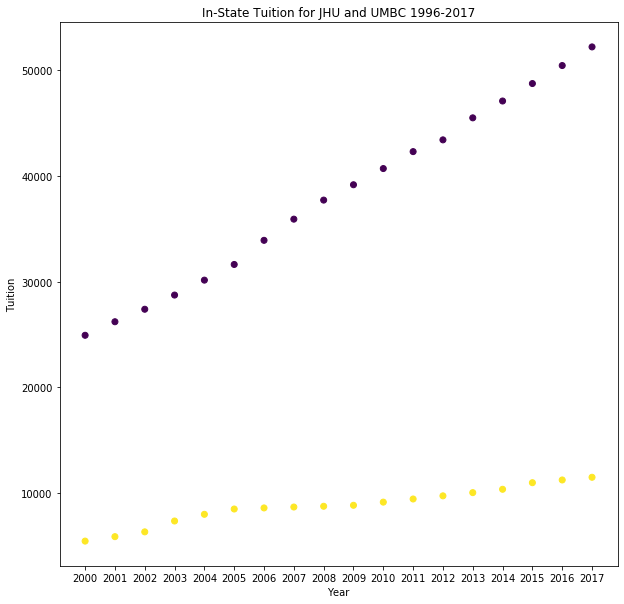

In [71]:
# <13>
# Plot the in-state tuition of both UMBC and JHU over the 22 years on the same plot
# This plot will help us compare the two universities.

fig, ax = plt.subplots(figsize=(10,10))  
ax.scatter(comb['YEAR'], comb['TUITIONFEE_IN'], c=comb['UNITID'])
ax.set_title('In-State Tuition for JHU and UMBC 1996-2017')
ax.set_xlabel('Year')
ax.set_ylabel('Tuition')

In [ ]:
# <14> 
# document your observation/conclusion of the plot (use the following Markdown cell)

#### Based on my observation of the plot, 
#### UMBC have lower tuition fee rates on an average over the 22 years as compared to John Hopskins University.
#### And one more thing, UMBC's increase in tuition fee rate is much lower than John Hopskins University in given 22 years.

In [ ]:
# The end.